## Business Objective: What was the impact of the COVID-19 pandemic on the level of home court advantage?
- Question 1: How has the difference in win-loss ratio between home and away teams changed from the 2019-20 season to the 2022-23 season? (wl_home and wl_away columns in game table)
- Question 2: How has the difference in average points scored between home and away teams changed from the 2019-20 season to the 2022-23 season? (pts_home and pts_away columns in game table)
- Question 3: How has the difference in offensive and defensive rebounds between home and away teams changed from 2019-20 to 2022-23?(oreb_home, oreb_away, dreb_home, dreb_away in the game table)
- Question 4: How does the average number of three-point field goals made by home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (fg3_pct_home and fg3_pct_away columns in game table)
- Question 5: How does the free throw percentage of home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (ft_pct_home and ft_pct_away in the game table)

In [392]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

con = sqlite3.connect("data/nba.sqlite")
con_reading = pd.read_sql_query('SELECT * FROM game', con)

#### Question 1: How has the difference in win-loss percentage between home and away teams changed from the 2019-20 season to the 2022-23 season? (wl_home and wl_away columns in game table)

/var/folders/6w/z6p8sp3s2mbf3s362f6y845c0000gn/T/ipykernel_1272/3981507834.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  covid_wl = covid_wl.replace('L', 0)
/var/folders/6w/z6p8sp3s2mbf3s362f6y845c0000gn/T/ipykernel_1272/3981507834.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['home', 'away'], fontsize=10)


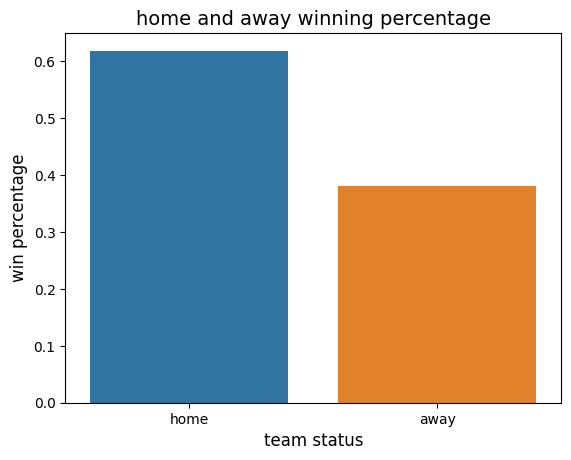

In [393]:
covid_wl = pd.read_sql_query("SELECT wl_home, wl_away, season_id FROM game WHERE season_id", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

count_win = 1

# calculating the winning percentage of home and away game
def winning_percentage(game_column):
    game_list = covid_wl[game_column].to_list()
    total = len(game_list)
    win = game_list.count(count_win)
    return win / total

# home winning percentage
home_game = winning_percentage('wl_home')
# away winning percentage
away_game = winning_percentage('wl_away')

home_away_winning_percentage = {'Home Winning Percentage': [home_game],
                            'Away Winning Percentage': [away_game]}
home_away_winning_percentage = pd.DataFrame(home_away_winning_percentage)
home_away_winning_percentage
ax = sns.barplot(data=home_away_winning_percentage)
ax.set_title('home and away winning percentage', fontsize=14)
ax.set_xlabel('team status', fontsize=12)
ax.set_ylabel('win percentage', fontsize=12)
ax.set_xticklabels(['home', 'away'], fontsize=10)
plt.show()

#### Question 2: How has the difference in average points scored between home and away teams changed from the 2019-20 season to the 2022-23 season? (pts_home and pts_away columns in game table)

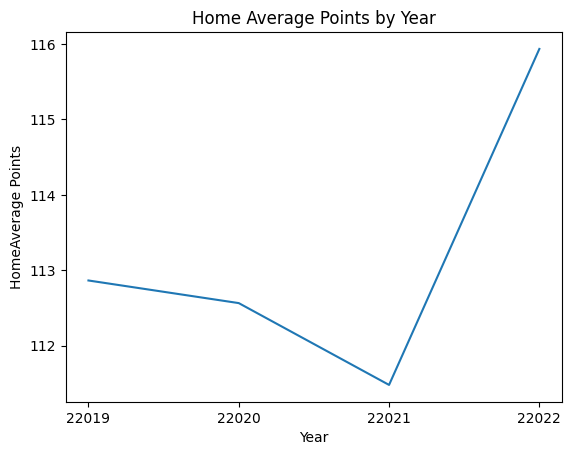

In [394]:
covid_wl = pd.read_sql_query("SELECT pts_home, pts_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)


mean_pts_home = covid_wl.groupby('season_id').agg({
    'pts_home': 'mean'
})
mean_pts_home
sns.lineplot(x=mean_pts_home.index, y=mean_pts_home['pts_home'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('HomeAverage Points')
plt.title('Home Average Points by Year')

# Show the plot
plt.show()

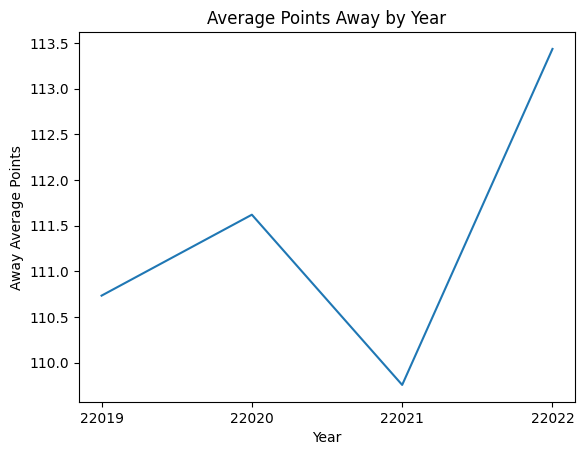

In [395]:
covid_wl = pd.read_sql_query("SELECT pts_home, pts_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)


mean_pts_away = covid_wl.groupby('season_id').agg({
    'pts_away': 'mean'
})
mean_pts_away
sns.lineplot(x=mean_pts_away.index, y=mean_pts_away['pts_away'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Away Average Points')
plt.title('Average Points Away by Year')

# Show the plot
plt.show()

#### Question 3: How has the difference in offensive and defensive rebounds between home and away teams changed from 2019-20 to 2022-23?(oreb_home, oreb_away, dreb_home, dreb_away in the game table)

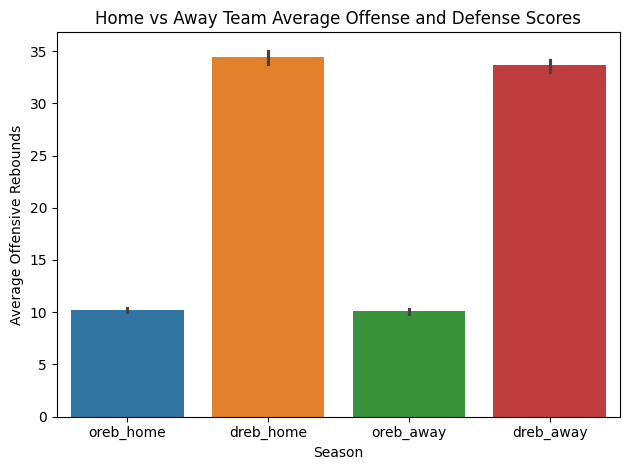

In [396]:
covid_wl = pd.read_sql_query("SELECT oreb_home, oreb_away, dreb_home, dreb_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

home_od = covid_wl.groupby('season_id').agg({
    'oreb_home': 'mean',
    'dreb_home': 'mean'
})
away_od = covid_wl.groupby('season_id').agg({
    'oreb_away': 'mean',
    'dreb_away': 'mean'
})

# Combine both DataFrames into one
df = pd.concat([home_od, away_od], axis=0)
sns.barplot(data=df)
plt.title('Home vs Away Team Average Offense and Defense Scores')
plt.xlabel('Season')
plt.ylabel('Average Offensive Rebounds')
plt.tight_layout()
plt.show()

#### Question 4: How does the average number of three-point field goals made by home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (fg3_pct_home and fg3_pct_away columns in game table)

season_id  season_fg3_home_med
22022      0.364                  1230
22021      0.351                  1230
22020      0.368                  1080
22019      0.361                  1059
Name: count, dtype: int64


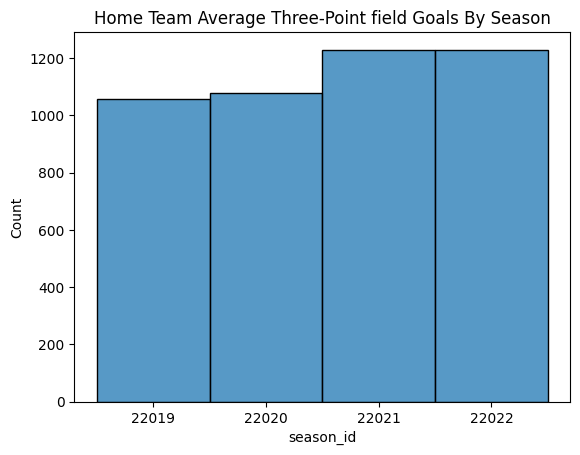

In [389]:
covid_wl = pd.read_sql_query("SELECT fg3_pct_home, fg3_pct_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

covid_wl["season_fg3_home_med"] = covid_wl.groupby("season_id")["fg3_pct_home"].transform(lambda x: x.median())
print(covid_wl[["season_id", "season_fg3_home_med"]].value_counts())
sns.histplot(data=covid_wl, x='season_id')
plt.title('Home Team Average Three-Point field Goals By Season')
plt.show()


season_id  season_fg3_away_med
22022      0.3505                 1230
22021      0.3495                 1230
22020      0.3590                 1080
22019      0.3540                 1059
Name: count, dtype: int64


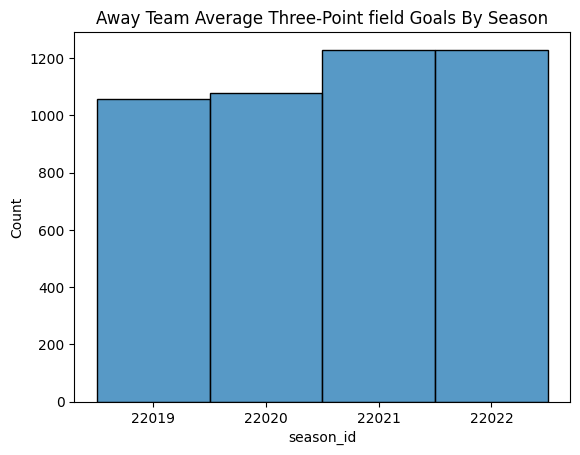

In [390]:
covid_wl = pd.read_sql_query("SELECT fg3_pct_home, fg3_pct_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

covid_wl["season_fg3_away_med"] = covid_wl.groupby("season_id")["fg3_pct_away"].transform(lambda x: x.median())
print(covid_wl[["season_id", "season_fg3_away_med"]].value_counts())
sns.histplot(data=covid_wl, x='season_id')
plt.title('Away Team Average Three-Point field Goals By Season')
plt.show()

#### Question 5: How does the free throw percentage of home teams compare to that of away teams from the 2019-20 season to the 2022-23 season? (ft_pct_home and ft_pct_away in the game table)

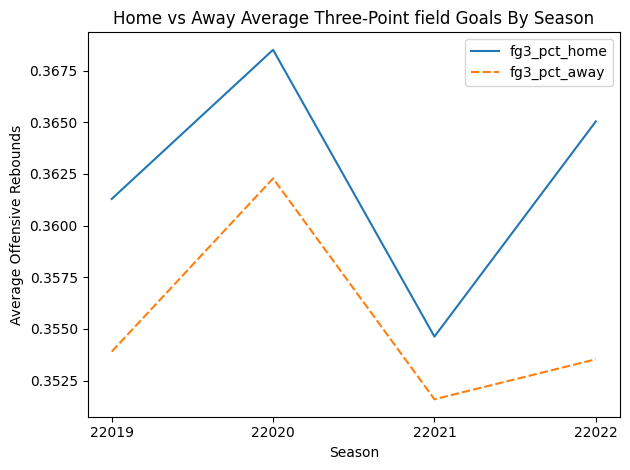

In [391]:
covid_wl = pd.read_sql_query("SELECT fg3_pct_home, fg3_pct_away, season_id FROM game WHERE season_id IN ('22019', '22020','22021', '22022')", con)
covid_wl = covid_wl.replace('W', 1)
covid_wl = covid_wl.replace('L', 0)

home_fg3 = covid_wl.groupby('season_id').agg({
    'fg3_pct_home': 'mean'
})
away_fg3 = covid_wl.groupby('season_id').agg({
    'fg3_pct_away': 'mean'
})

# Combine both DataFrames into one
df = pd.concat([home_fg3, away_fg3], axis=0)

sns.lineplot(df)

plt.title('Home vs Away Average Three-Point field Goals By Season')
plt.xlabel('Season')
plt.ylabel('Average Offensive Rebounds')
plt.tight_layout()
plt.show()